# Support Vector Machines(SVMs)

- It is a supervised machine learning algorithm which can be used for both classification and regression.
- In terms of **classification**, it is a discriminative classifier which is used to find the optimal hyper-plane in order to categorize data into different classes. 
  - In two dimensional space, this optimal hyper-plane can be thought of as a line dividing the space into two parts : where one part of the space contains datapoints which belong to one class while other part of the space contains datapoints which belong to the other class. 
  - The concept of lines acting as a classifier is only true if the data points are linearly separable. SVMs can also be used to find the optimal curve which can be used to classify the data points that are not linearly separable.
- For our convenience, we will explain the concepts with respect to two dimensional space and lines which can be extended to greater than two dimensional space and hyper-planes.
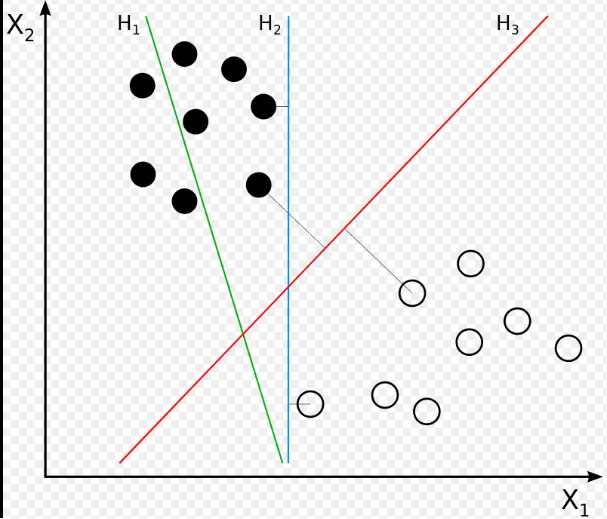

- Let us consider the above figure. We have two kinds of datapoints here. Consider that the datapoints marked in black color filled belong to positive class and the datapoints marked with black color border belong to negative class. We have three straight lines which can divide the datapoints two classes, but the main question is :**“ Which straight line is the best for the classification task ?“**.
- The **optimal hyper-plane** is defined by the plane that maximizes the perpendicular distance between the hyper-plane and the closest samples. This perpendicular distance can be spanned with support vectors.
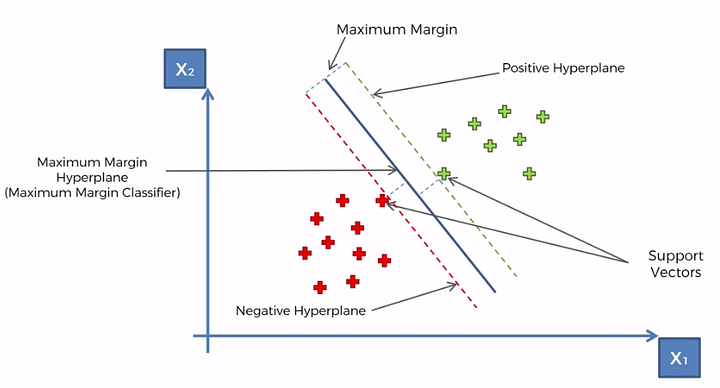

- We can see that there are three hyper-planes:
  - The hyper-plane that is touching the points of the positive class is called the **positive hyper-plane.**
  - The hyper-plane that is touching the points of the negative class is called the **negative hyper-plane.**
  - The hyper-plane that is situated in between the positive and negative class is called the **separating hyper-plane.**
  - All these three hyper-planes are parallel to each other.
  - The distance between the positive and negative hyper-plane is called the **“margin”**. If we maximize the margin, then positive and negative points are quite far away from each other as well as from the separating hyper-plane. Hence the accuracy of the classification task increases. The wider the margin, the better it is for the classification task.
  - SVMs try to find a hyper-plane, that maximizes the margin. Hence the optimal or separating hyper-plane is also called **“margin-maximizing hyper-plane”**.Hence in figure 1, the H3 hyper-plane is the best hyper-plane.
  - **Support Vectors** are those data points that touch the positive and negative hyper-planes. In Figure 2, we can see that there are some data points which first touch the positive and negative hyper-planes, these data points are known as “Support Vectors”.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys() #The data set is presented in a dictionary form

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.30, random_state=101)

# Train the Support Vector Classifier

In [11]:
from sklearn.svm import SVC
model = SVC(kernel= 'rbf', C=1.0, gamma= 'scale')
model.fit(X_train,y_train)

SVC()

In [12]:
predictions = model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print(confusion_matrix(y_test,predictions))

[[ 56  10]
 [  3 102]]


In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



# The Kernel Trick

- **Linearly Separable Data points**: Data points can be said to be linearly separable if a separating boundary/hyperplane can easily be drawn showing distinctively the different class groups. Linear separable data points mostly require linear machine learning classifiers such as Logistic regression for example.
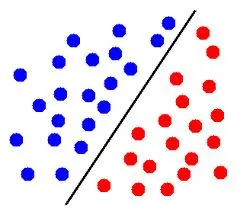
- **Non-Linearly Separable data points**: This is the exact opposite of Linearly separable data points. View the image below, notice that no matter how one tries to draw a straight line, some data points will one way or the other get misclassified. SVM has a special way of classifying this type of data. It uses Kernel functions to represent these data points in a higher-dimensional space and then finds the optimal separating hyperplane.
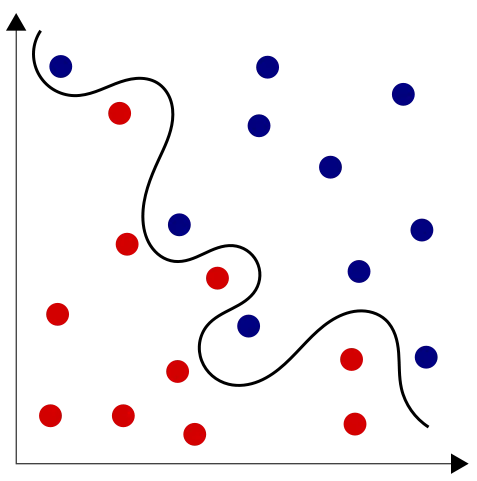

- This is done by representing the data points in a higher-dimensional space than its original. For example, a 1D data can be represented as a 2D data in space, a 2D data can be represented as a 3D data et cetera. So why is it called a ‘kernel trick’? SVM cleverly re-represents non-linear data points using any of the kernel functions in a way that it seems the data have been transformed, then finds the optimal separating hyperplane. However, in reality, the data points still remain the same, they have not actually been transformed. This is why it is called a **‘kernel Trick’**.

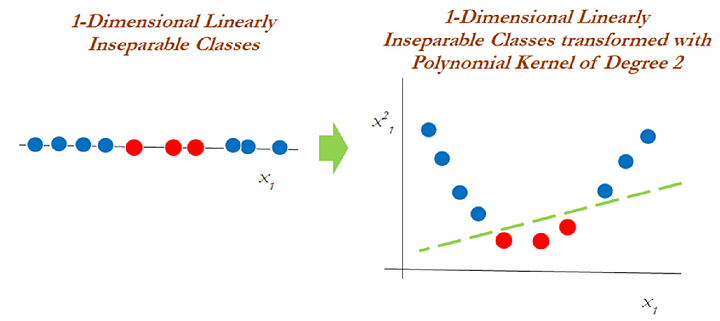

- Now consider what if we had data as shown in image below? Clearly, there is no line that can separate the two classes in this x-y plane. So what do we do? We apply transformation and add one more dimension as we call it z-axis. Lets assume value of points on z plane, w = x² + y². In this case we can manipulate it as distance of point from z-origin. Now if we plot in z-axis, a clear separation is visible and a line can be drawn.
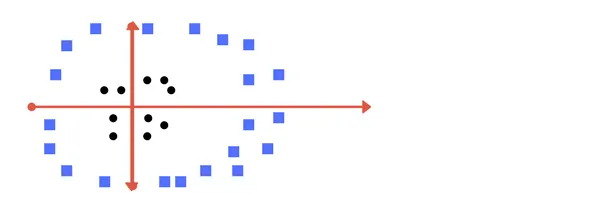
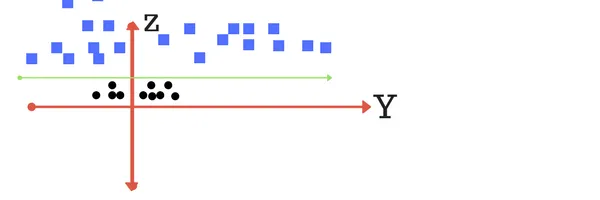
- When we transform back this line to original plane, it maps to circular boundary as shown in below image .
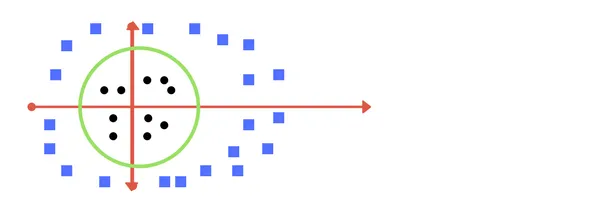

- A function that transforms one feature vector into a higher dimensional feature vector is not a kernel function. Thus f(x) = $[x, x²]$ is not a kernel. It is simply a new feature vector. You do not need kernels to do this. You need kernels if you want to do this, or more complicated feature transformations without blowing up dimensionality.
- A kernel is not restricted to SVMs. Any learning algorithm that only works with dot products can be written down using kernels. 
- K(x, y)=<f(x), f(y)>, where,
`K is the kernel function,
X and Y are the dimensional inputs,
f is the map from n-dimensional to m-dimensional space and,
< x, y > is the dot product.`
- Let us say that we have two points, x= (2, 3, 4) and y= (3, 4, 5)
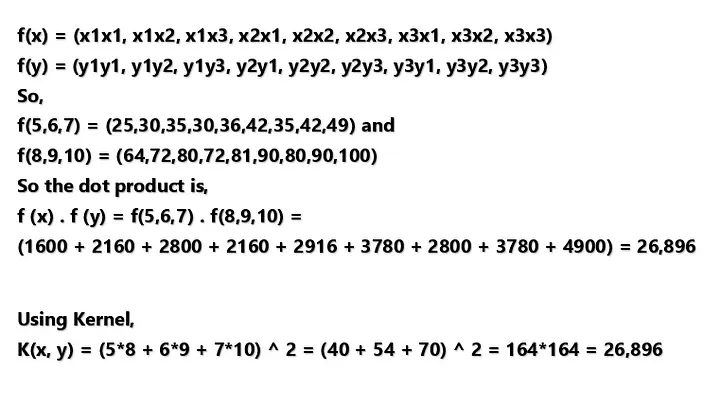

# Mathematical Formulation of SVMs

- Let us consider that the positive and negative hyper-planes are at unit distances away from the separating hyper-plane.
- **Hard Margin SVM**
  - Hard Margin Classification only works if the data is linearly separable also Hard Margins are very sensitive to outliers.
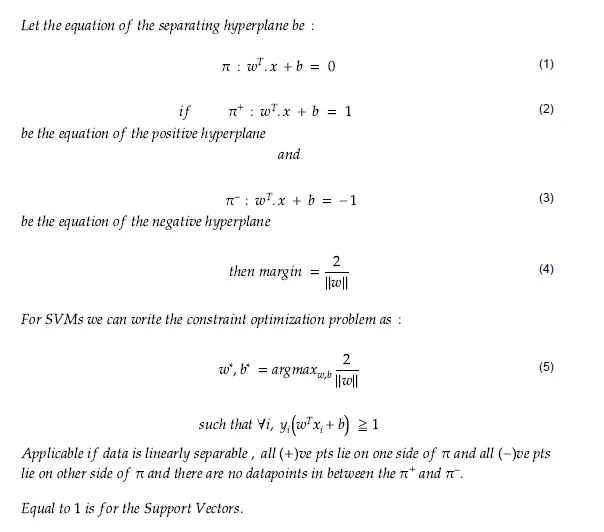

- **Soft Margin SVM**
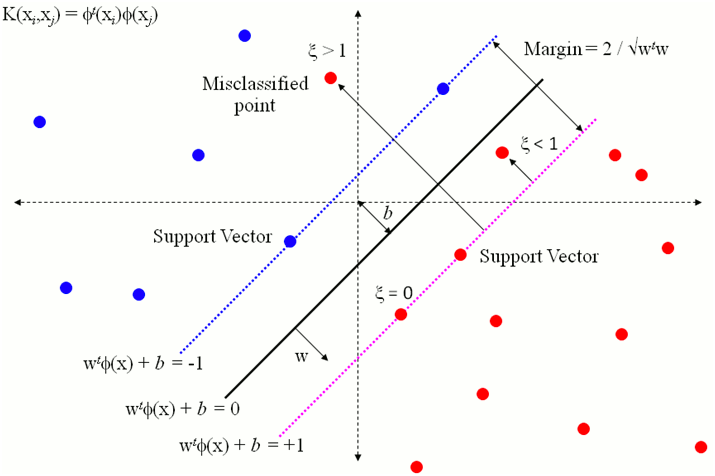
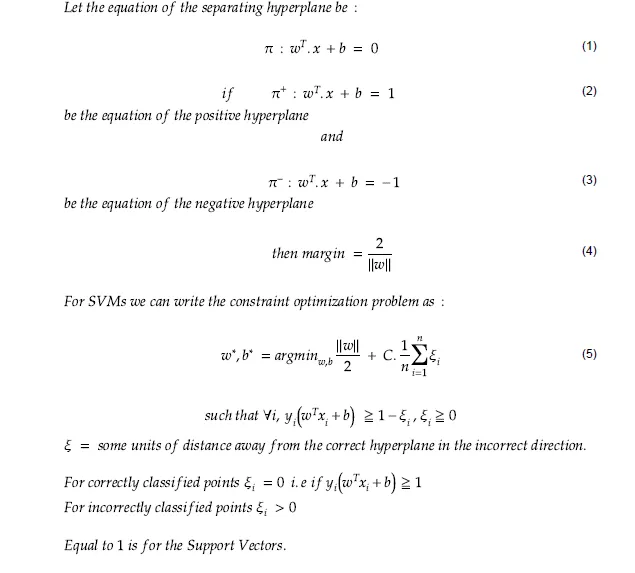

- In equation 5, the first portion of the equation before the ‘+’ sign is referred to as the ‘regularization’ and the second portion is referred to as the ‘Hinge Loss’.
- **PARAMETERS**:
  - **‘C’** is the hyper-parameter which is always a positive value. If ‘C’ increases, then overfitting increases and if ‘C’ decreases, then underfitting increases. For large values of ‘C’, the optimization will choose a smaller-margin hyper-plane if that hyper-plane does a better job of getting all the training points classified correctly. Conversely, a very small value of ‘C’ will cause the optimizer to look for a larger-margin separating hyper-plane, even if that hyper-plane misclassifies more points.
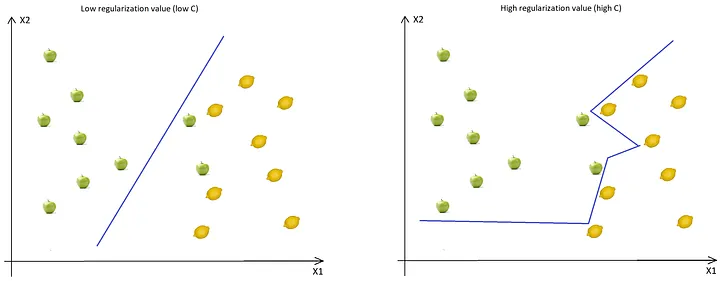
  - **Gamma**: The next important parameter is Gamma. The gamma parameter defines how far the influence of a single training example reaches. This means that high Gamma will consider only points close to the plausible hyperplane and low Gamma will consider points at greater distance.
  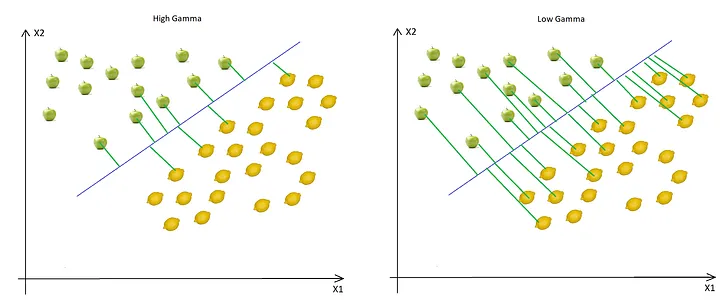
  - **kernel**: ‘linear’, ‘polynomial’ or ‘rbf’. Type of kernel you want to use
  - **degree**: In case of polynomial kernel you can specify degree of polynomial you want to use.

# Common Types of Kernels used in SVM

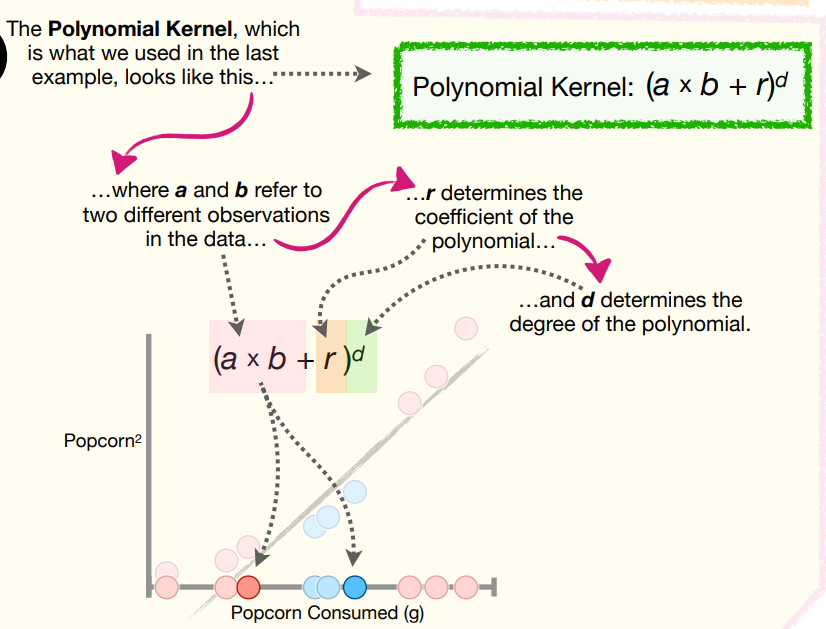

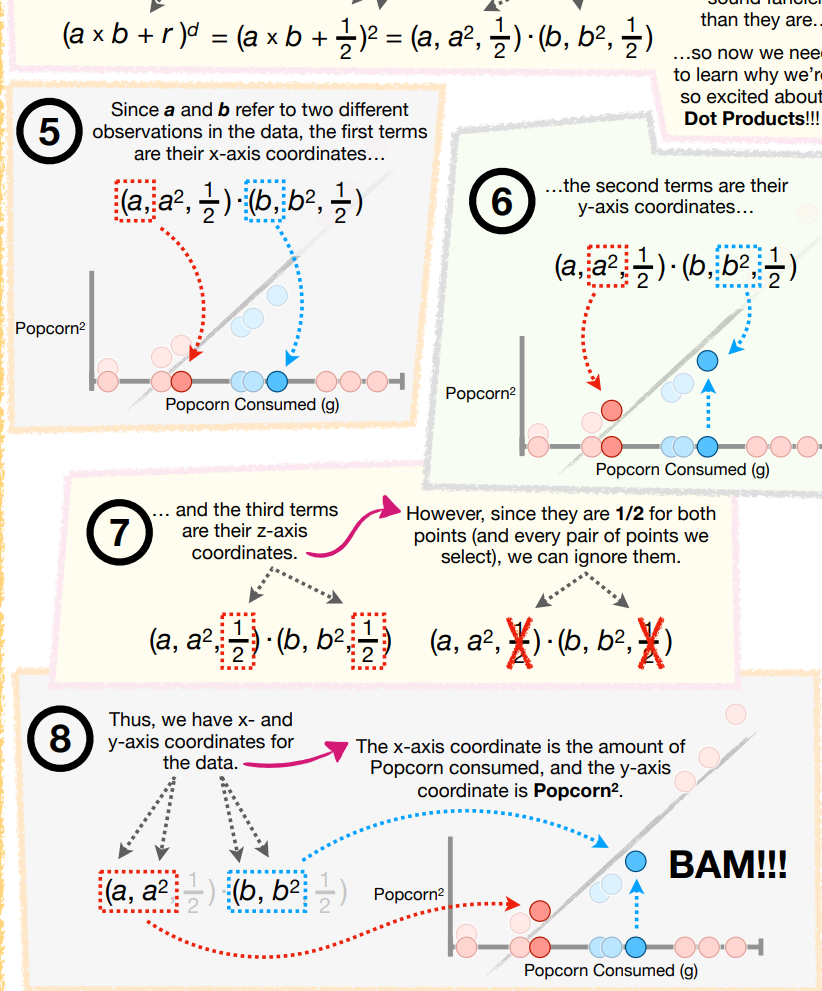

- The reason Support Vector Machines use Kernels is that they eliminate the need to actually transform the data from low dimensions to high dimensions. Instead, the Kernels use the Dot Products between every pair of points to compute their high dimensional relationships and find the optimal Support Vector Classifier.
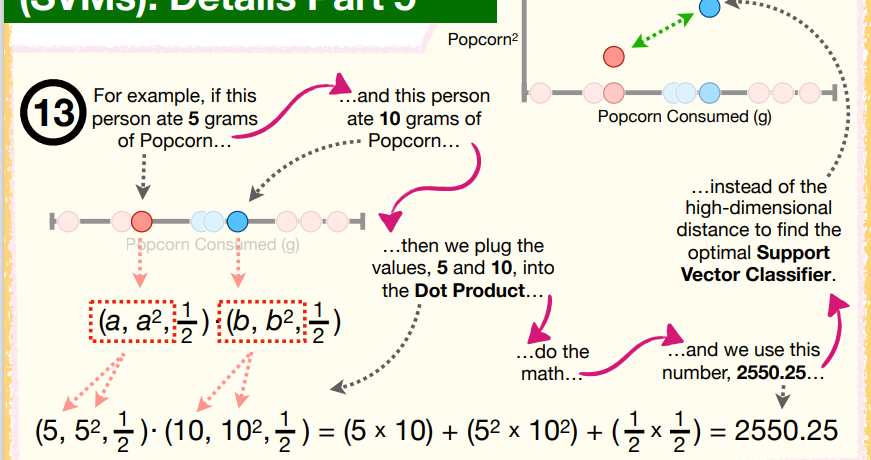

**Radial Basis Function**:
- The basic idea behind the Radial Kernel is that when we want to classify a new perso, we simply look to see how the closest points from the Training Data are classified. 
- This Greek symbol γ, gamma, scales how much influence neighboring points have on classificatio, and we find a good value for γ(gamma) by trying a bunch of values and using Cross Validationto determine which is best.
- Radial Kernel is like a Polynomial Kernel, but with r = 0 and d = infinity
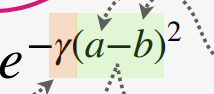

# Gridsearch

Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. 

In [29]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [32]:
# May take awhile!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.613 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.912 total time=   0.0s
[CV 3/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [33]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [34]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [35]:
grid_predictions = grid.predict(X_test)

In [36]:
print(confusion_matrix(y_test,grid_predictions))

[[ 59   7]
 [  4 101]]


In [37]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

